In [96]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import make_classification
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression

In [97]:
x, y = make_classification(n_samples=100, n_features=2, n_redundant=0)
x, y 

(array([[ 2.30302143e+00,  8.55102403e-01],
        [-1.05581294e+00,  1.32718147e+00],
        [-2.18520365e-01,  1.00431467e+00],
        [-5.56476274e-01,  2.96939507e-01],
        [-8.56225803e-01,  9.50876233e-01],
        [ 1.94778969e+00,  1.92060011e+00],
        [-1.46285529e+00, -1.73429517e+00],
        [ 2.20815687e+00,  1.31563523e+00],
        [ 1.34874845e+00,  1.06324792e+00],
        [ 1.46165277e+00, -1.65716698e+00],
        [ 1.33441112e+00,  1.03337107e+00],
        [-1.78034031e+00,  1.97592107e+00],
        [ 4.14429093e-03,  4.51086939e-01],
        [ 2.06724068e+00,  4.24587749e-01],
        [ 5.90287628e-01, -6.33898631e-01],
        [ 4.13537865e-01,  1.28077788e+00],
        [ 5.00702957e-01,  4.40573089e-01],
        [-1.56291732e+00,  1.84418469e+00],
        [ 1.20581519e+00,  8.07859490e-01],
        [ 1.30118247e+00, -2.44851907e+00],
        [-2.01564314e+00, -8.70937043e-01],
        [ 1.16563070e+00, -1.85706766e-01],
        [ 7.98489116e-01,  1.244

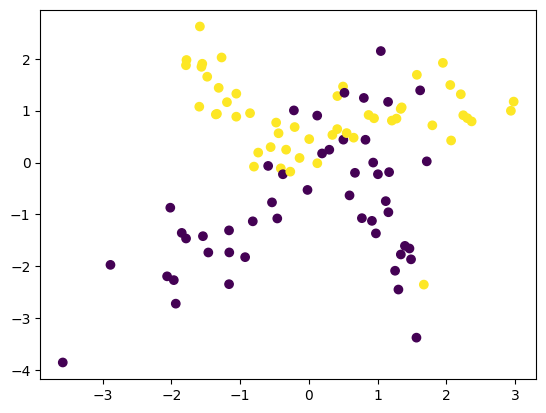

In [98]:
plt.scatter(x[:, 0], x[:, 1], c=y)

In [99]:
x_train, x_test, y_train, y_test =train_test_split(x, y)

In [100]:
knn_model = KNeighborsClassifier()
random_model = RandomForestClassifier()
decision_model = DecisionTreeClassifier()
logistic_model = LogisticRegression()

In [101]:
for model in (knn_model, random_model, decision_model, logistic_model):
    model.fit(x_train, y_train)
    model_score = model.score(x_test, y_test)
    print("Score:", model_score, " Model:", model)

Score: 0.76  Model: KNeighborsClassifier()
Score: 0.72  Model: RandomForestClassifier()
Score: 0.68  Model: DecisionTreeClassifier()
Score: 0.84  Model: LogisticRegression()


In [102]:
from sklearn.ensemble import VotingClassifier

In [103]:
equal_voting_classifier = VotingClassifier(
    estimators=[('KNeighborsClassifier', knn_model), ('DecisionTreeClassifier', decision_model), ('LogisticRegression', logistic_model)]
)
equal_voting_classifier

,estimators,"[('KNeighborsClassifier', ...), ('DecisionTreeClassifier', ...), ...]"
,voting,'hard'
,weights,None
,n_jobs,None
,flatten_transform,True
,verbose,False
,n_neighbors,5
,weights,'uniform'
,algorithm,'auto'
,leaf_size,30
,p,2


In [104]:
equal_voting_classifier.fit(x_train, y_train)
ev_score = equal_voting_classifier.score(x_test, y_test)
ev_score

0.72

In [105]:
pondere_classifier = VotingClassifier(
    estimators=[('KNeighborsClassifier', knn_model), ('DecisionTreeClassifier', decision_model), ('LogisticRegression', logistic_model)],
    weights = [8, 1, 1]
)
pondere_classifier.fit(x_train, y_train)
p_score = pondere_classifier.score(x_test, y_test)
p_score

0.76

In [107]:
from sklearn.model_selection import GridSearchCV

In [108]:
grid_search = GridSearchCV(pondere_classifier, param_grid={'weights': [[8, 1, 1], [1, 1, 1], [1, 1, 2], [1, 2, 2]]})

grid_search

,estimator,"VotingClassif...hts=[8, 1, 1])"
,param_grid,"{'weights': [[8, 1, ...], [1, 1, ...], ...]}"
,scoring,None
,n_jobs,None
,refit,True
,cv,None
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,n_neighbors,5


In [109]:
grid_search.fit(x_train, y_train)
grid_search.score(x_test, y_test)

0.72

In [112]:
grid_search.best_estimator_

,estimators,"[('KNeighborsClassifier', ...), ('DecisionTreeClassifier', ...), ...]"
,voting,'hard'
,weights,"[1, 1, ...]"
,n_jobs,None
,flatten_transform,True
,verbose,False
,n_neighbors,5
,weights,'uniform'
,algorithm,'auto'
,leaf_size,30
,p,2


In [113]:
grid_search.best_estimator_.weights

[1, 1, 1]